# 08 - SVM

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

In [2]:
# Load your dataset
df = pd.read_csv("Numeric data (last year work).csv")

In [3]:
# Define features (X) and target (y)
target_column = "Rating"  # Replace with your actual target column name if different
X = df.drop(columns=[target_column])
y = df[target_column]

In [4]:
# Feature scaling (SVM is sensitive to scale)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [6]:
# Define base models (Level-0)
base_models = [
    ('ridge', Ridge(alpha=1.0)),  
    ('lasso', Lasso(alpha=0.01)),  
    ('random_forest', RandomForestRegressor(n_estimators=200, random_state=42)),
    ('xgboost', XGBRegressor(n_estimators=200, learning_rate=0.05, random_state=42)),
    ('catboost', CatBoostRegressor(verbose=0, random_seed=42)),
    ('lightgbm', LGBMRegressor(random_state=42))
]

# Define meta-model (Level-1)
meta_model = Ridge(alpha=1.0)  # Can be Ridge or Lasso

In [7]:
# Create stacking model
stacking_model = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_model,
    cv=5,  # Cross-validation splits
    n_jobs=-1  # Use all CPU cores
)

In [8]:
# Train the model
stacking_model.fit(X_train, y_train)

StackingRegressor(cv=5,
                  estimators=[('ridge', Ridge()), ('lasso', Lasso(alpha=0.01)),
                              ('random_forest',
                               RandomForestRegressor(n_estimators=200,
                                                     random_state=42)),
                              ('xgboost',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_met...
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=200, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=42,
                                            reg_alpha=None, reg_lambda=None, ...)),
                              ('catboost',
                               <catboost.core.CatBoostRegressor object at 0x0000025258D5CBB0>),
                              ('lightgbm', LGBMRegressor(random_state=42))],
                  final_estimator=Ridge(), n_jobs=-1)

In [9]:
# Make predictions
y_pred = stacking_model.predict(X_test)

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")

# Lower MSE = better model
# Lower RMSE = better model
# Lower MAE = better model
# R² Score
# 1.0: Perfect model (explains all the variance).
# 0.0: Model performs no better than a horizontal line (mean prediction).

# Linear Regression - 01
# Mean Squared Error (MSE): 0.1328
# Root Mean Squared Error (RMSE): 0.3645
# Mean Absolute Error (MAE): 0.2915
# R² Score: 0.5034

# XGBoost - 02
# Mean Squared Error (MSE): 0.1269
# Root Mean Squared Error (RMSE): 0.3563
# Mean Absolute Error (MAE): 0.2802
# R² Score: 0.5255

# CatBoost - 03
# Mean Squared Error (MSE): 0.1228
# Root Mean Squared Error (RMSE): 0.3504
# Mean Absolute Error (MAE): 0.2792
# R² Score: 0.5411

# AdaBoost - 04
# Mean Squared Error (MSE): 0.1453
# Root Mean Squared Error (RMSE): 0.3811
# Mean Absolute Error (MAE): 0.3070
# R² Score: 0.4570

# LightGBM - 05
# Mean Squared Error (MSE): 0.1328
# Root Mean Squared Error (RMSE): 0.3645
# Mean Absolute Error (MAE): 0.2915
# R² Score: 0.5034

# Random forest - 06
# Mean Squared Error (MSE): 0.1328
# Root Mean Squared Error (RMSE): 0.3645
# Mean Absolute Erro

# KNN - 07
# Mean Squared Error (MSE): 0.1890
# Root Mean Squared Error (RMSE): 0.4348
# Mean Absolute Error (MAE): 0.3478
# R² Score: 0.2933

# SVM - 08
# Mean Squared Error (MSE): 0.2097
# Root Mean Squared Error (RMSE): 0.4579
# Mean Absolute Error (MAE): 0.3797
# R² Score: 0.2161

# Ridge (Lasso) Regression - 09
# Ridge Regression - R² Score: 0.5116, RMSE: 0.3615, MAE: 0.2888
# Lasso Regression - R² Score: 0.5107, RMSE: 0.3618, MAE: 0.2878

# my opinion:
# R² Score is more or less the same
# all other metrics are almost similar to first 4 models

Mean Squared Error (MSE): 0.1237
Root Mean Squared Error (RMSE): 0.3517
Mean Absolute Error (MAE): 0.2793
R² Score: 0.5377


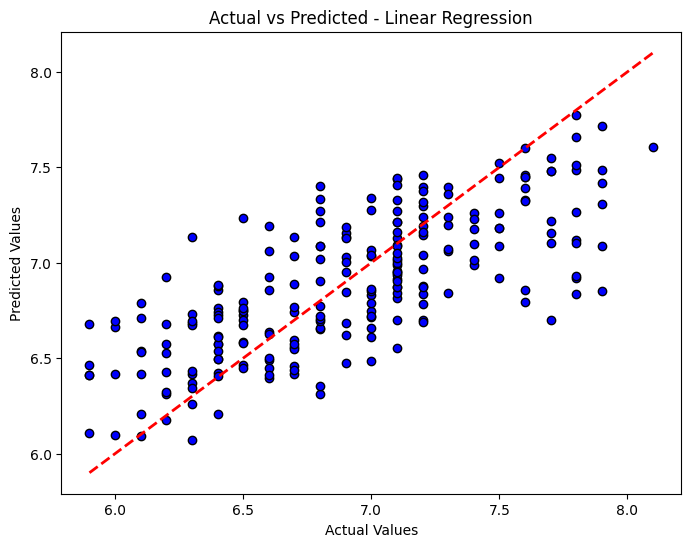

In [ ]:
# Plot: Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted - Linear Regression")
plt.show()

# linear graph is not perfect but some of previous models
# had even worse graph

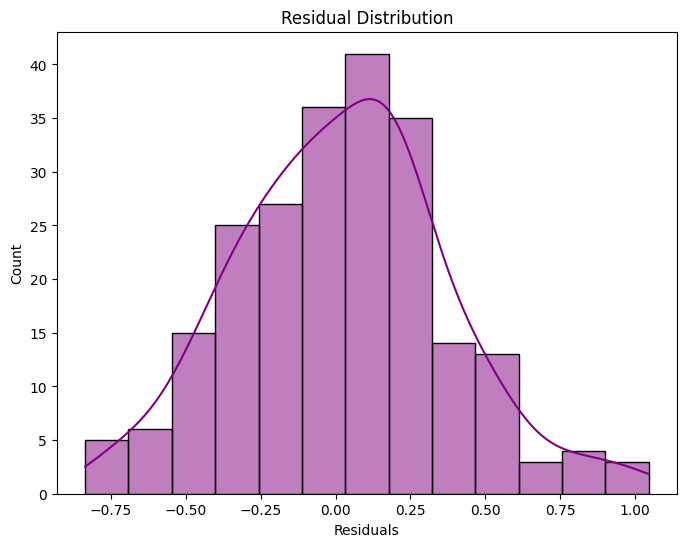

In [ ]:
# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='purple')
plt.title("Residual Distribution")
plt.xlabel("Residuals")
plt.show()

# the distribution changed a bit
# and it looks good

# as far as I understood: it correlates with graph
# graph changes --> distribution changes
# because if graphs indentified different patterns,
# distribution will be different too
